Lånebeløp


 20000000


Nedbetalingsår


 15


Rente


 2


Den årlige renten på dette lånet er: = 2.0 %
Lengden på lånet i måneder er: = 180 måneder
Månedlige betalinger for dette lånet blir på: = 128701.74 Kr
Den totale summen av renter betalt blir: = 3166313.22


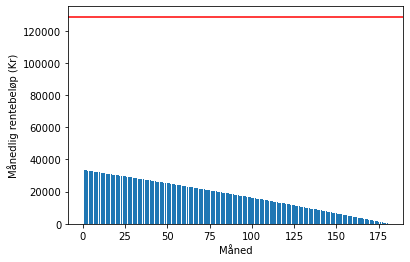

Betaling  Beløp     Rente     Avdrag    Restlån             
    1  128,701.74 22,222.22  106,479.5219,893,520.48
    2  128,701.74 22,103.91  106,597.8319,786,922.65
    3  128,701.74 21,985.47  106,716.2719,680,206.38
    4  128,701.74 21,866.90  106,834.8419,573,371.54
    5  128,701.74 21,748.19  106,953.5519,466,417.99
    6  128,701.74 21,629.35  107,072.3919,359,345.60
    7  128,701.74 21,510.38  107,191.3619,252,154.25
    8  128,701.74 21,391.28  107,310.4619,144,843.79
    9  128,701.74 21,272.05  107,429.6919,037,414.10
   10  128,701.74 21,152.68  107,549.0618,929,865.04
   11  128,701.74 21,033.18  107,668.5618,822,196.48
   12  128,701.74 20,913.55  107,788.1918,714,408.29
   13  128,701.74 20,793.79  107,907.9518,606,500.34
   14  128,701.74 20,673.89  108,027.8518,498,472.49
   15  128,701.74 20,553.86  108,147.8818,390,324.61
   16  128,701.74 20,433.69  108,268.0518,282,056.56
   17  128,701.74 20,313.40  108,388.3418,173,668.22
   18  128,701.74 20,192.96  108,508.7

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lager inputs der brukeren kan taste inn verdiene sine
def Verdier():
    print("Lånebeløp")
    låne_sum = float(input())
    print("Nedbetalingsår")
    låne_periode = float(input())
    lån_termin = int(12*låne_periode)
    print("Rente")
    lån_rente = float(input())
    return låne_sum, låne_periode, lån_termin, lån_rente

def Kalk(låne_sum, låne_periode, lån_termin, lån_rente):   
    R = ((lån_rente/100)/12) + 1
    X = låne_sum*(R**lån_termin)*(1-R)/(1-R**lån_termin) # Funksjon for annuitetslån
    Månedlig_rente = []
    Månedlig_saldo = []
    
    for i in range(1, lån_termin+1):
        Rente = låne_sum*(R-1)
        låne_sum = låne_sum-(X-Rente)
        Månedlig_rente = np.append(Månedlig_rente,Rente)
        Månedlig_saldo = np.append(Månedlig_saldo, låne_sum)
    # Skriver ut hva beløpene blir
    print("Den årlige renten på dette lånet er: = " +str(lån_rente)+str(' %'))
    print("Lengden på lånet i måneder er: = " + str(lån_termin)+str(' måneder'))
    print("Månedlige betalinger for dette lånet blir på: = " +str(np.round(X,2)) + str(' Kr')) # Bruker round til å avrunde til to desimaler
    print("Den totale summen av renter betalt blir: = " + str(np.round(np.sum(Månedlig_rente),2)))
 
    # Prøver å plotte terminbeløp og rente i graf
    
    plt.bar(range(1, lån_termin+1), Månedlig_rente, lw=2)
    plt.axhline(y=X, color='red')
    plt.xlabel('Måned')
    plt.ylabel('Månedlig rentebeløp (Kr)')
    plt.show()   
    return X, R
        
def Terminbeløp_tabell (X, lån_termin, R, låne_sum, lån_rente):
    overskrift = '{0:10}{1:10}{2:10}{3:10}{4:20s}'
    verdier = '{0:5d}{1:12,.2f}{2:10,.2f}{3:12,.2f}{4:12,.2f}'
    print(overskrift.format('Betaling', 'Beløp', 'Rente', 'Avdrag', 'Restlån'))
    Restlån = abs(låne_sum)
    for Betaling in range(1, int(lån_termin)+1):
        Renter = abs(Restlån) * abs(lån_rente * .1/lån_termin)
        Avdrag = abs(X) - abs(Renter)
        Restlån -= abs(Avdrag)
        print(verdier.format(Betaling, X, Renter, Avdrag, Restlån))
        
def Regn(): 
    låne_sum, låne_periode, lån_termin, lån_rente = Verdier()
    X, R = Kalk(låne_sum, låne_periode, lån_termin, lån_rente)
    Terminbeløp_tabell(X, lån_termin, R, låne_sum, lån_rente)

Regn()    

In [9]:
sum(Restlån-Avdrag)

NameError: name 'Restlån' is not defined